# Do establishments improve their performance on inspections over time? 


In [24]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import os
import seaborn as sns
import datetime

In [25]:
df_g= pd.read_csv('https://s3.amazonaws.com/open.data.test/foodestablishment/food+establishment+grades.csv')

In [26]:
df_g.head()

,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
0,77958,3/14/2012 9:17,12/31/2012 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Pass,1/3/2012 7:26,0,100,A
1,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,6,94,A
2,18086,12/27/2011 12:46,12/31/2011 23:59,Inactive,RF,Retail Food,HE_Fail,1/3/2012 10:06,6,94,A
3,77035,1/26/2012 11:01,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,1/3/2012 10:07,12,88,B
4,20285,2/24/2012 14:46,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 10:32,2,98,A


In [27]:
len(df_g)

72243

In [28]:
#df_v = pd.read_csv('https://s3.amazonaws.com/open.data.test/foodestablishment/food+establishment+violations.csv')
#df_v.head()

In [29]:
#df_1=pd.DataFrame(df_v.replace({'VIOLLEVEL':{'*':1, '**':2, '***':3}}))
#df_1.head()

In [30]:
#df = pd.merge(df_g,
#                  df_1[['LICENSENO','VIOLLEVEL']],
#                  on="LICENSENO")

In [31]:
df_g['RESULTDTTM'] = pd.to_datetime(df_g['RESULTDTTM'])

In [32]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72243 entries, 0 to 72242
Data columns (total 11 columns):
LICENSENO         72243 non-null int64
ISSDTTM           72243 non-null object
EXPDTTM           72243 non-null object
LICSTATUS         72243 non-null object
LICENSECAT        72243 non-null object
DESCRIPT          72243 non-null object
RESULT            72243 non-null object
RESULTDTTM        72243 non-null datetime64[ns]
SUM_VIOLATIONS    72243 non-null int64
SCORE             72243 non-null int64
GRADE             72243 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 6.1+ MB


In [33]:
#df_g.RESULTDTTM = pd.to_datetime(df_g.RESULTDTTM)

In [34]:
df_g['Eins'] = np.ones(( len(df_g), ))
print (df_g.columns)

Index(['LICENSENO', 'ISSDTTM', 'EXPDTTM', 'LICSTATUS', 'LICENSECAT',
       'DESCRIPT', 'RESULT', 'RESULTDTTM', 'SUM_VIOLATIONS', 'SCORE', 'GRADE',
       'Eins'],
      dtype='object')


# ** Some Data Visualization **

In [35]:
licnum_count = df_g.groupby(['LICENSENO'],as_index=False)['Eins'].count()
df_1 = pd.DataFrame(licnum_count)
df_1.sort_values(by='Eins', ascending=False).head()

,LICENSENO,Eins
2546,24709,54
2575,24748,50
4696,74834,47
5110,78286,47
4666,74662,47


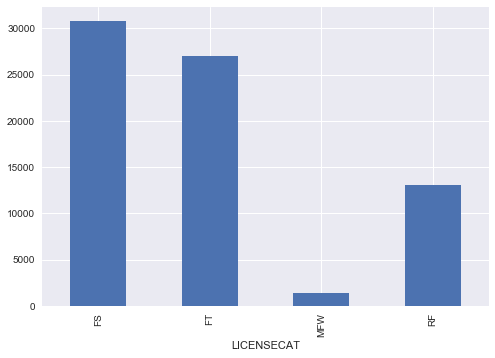

In [36]:
df_g.LICENSECAT
lcat=df_g.groupby(['LICENSECAT'])['Eins'].count()
lcat.plot(kind='bar',stacked=True)
plt.show()

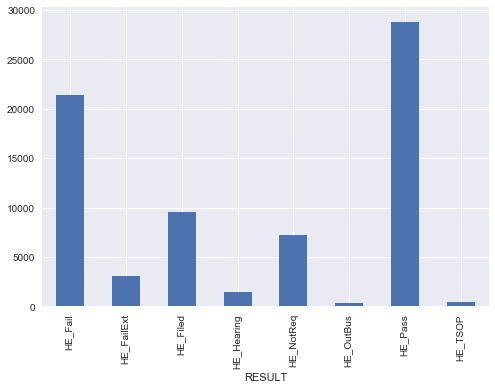

In [37]:
r=df_g.groupby(['RESULT'])['Eins'].count()
r.plot(kind='bar',stacked=True)
plt.show()

In [38]:
lcr = df_g.groupby(['LICENSECAT','RESULT'])['Eins'].count()
lcr

LICENSECAT  RESULT    
FS          HE_Fail        9910
            HE_FailExt     1437
            HE_Filed       3862
            HE_Hearing      606
            HE_NotReq      2963
            HE_OutBus       126
            HE_Pass       11699
            HE_TSOP         177
FT          HE_Fail        8256
            HE_FailExt     1155
            HE_Filed       3422
            HE_Hearing      586
            HE_NotReq      2577
            HE_OutBus        98
            HE_Pass       10697
            HE_TSOP         180
MFW         HE_Fail         344
            HE_FailExt       39
            HE_Filed        118
            HE_Hearing       28
            HE_NotReq       145
            HE_Pass         687
            HE_TSOP          40
RF          HE_Fail        2899
            HE_FailExt      416
            HE_Filed       2111
            HE_Hearing      194
            HE_NotReq      1577
            HE_OutBus        96
            HE_Pass        5745
            HE_TS

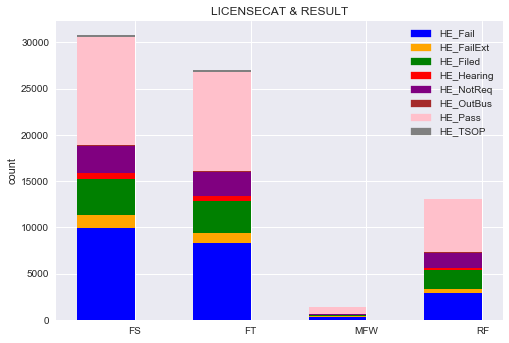

In [39]:
n=4
bars1 = np.array([9910, 8256,344,2899])
bars2 = np.array([1437,1155,39,416])
bars3 = np.array([3862,3422,118,2111])
bars4 = np.array([606,586,28,194])
bars5 = np.array([2963,2577,145,1577])
bars6 = np.array([126,98,0,96])
bars7 = np.array([11699,10697,687,5745])
bars8 = np.array([177,180,40,53])

ind=np.arange(n)
width=0.5

p1=plt.bar(ind,bars1,width,color="blue")
p2=plt.bar(ind,bars2,width,color="orange",bottom=bars1)
p3=plt.bar(ind,bars3,width,color="green",bottom=bars1+bars2)
p4=plt.bar(ind,bars4,width,color="red",bottom=bars1+bars2+bars3)
p5=plt.bar(ind,bars5,width,color="purple",bottom=bars1+bars2+bars3+bars4)
p6=plt.bar(ind,bars6,width,color="brown",bottom=bars1+bars2+bars3+bars4+bars5)
p7=plt.bar(ind,bars7,width,color="pink",bottom=bars1+bars2+bars3+bars4+bars5+bars6)
p8=plt.bar(ind,bars8,width,color="gray",bottom=bars1+bars2+bars3+bars4+bars5+bars6+bars7)


blue_patch = mpatches.Patch(color='blue', label='HE_Fail')
orange_patch = mpatches.Patch(color='orange', label='HE_FailExt')
green_patch = mpatches.Patch(color='green', label='HE_Filed')
red_patch = mpatches.Patch(color='red', label='HE_Hearing')
purple_patch = mpatches.Patch(color='purple', label='HE_NotReq')
brown_patch = mpatches.Patch(color='brown', label='HE_OutBus')
pink_patch = mpatches.Patch(color='pink', label='HE_Pass')
gray_patch = mpatches.Patch(color='gray', label='HE_TSOP')
plt.legend(handles=[blue_patch,orange_patch,green_patch,red_patch,purple_patch,brown_patch,pink_patch,gray_patch])


plt.ylabel("count")
plt.title("LICENSECAT & RESULT")
plt.xticks(ind+width/2,("FS","FT","MFW","RF"))
plt.show()

In [40]:
lcat_points = df_g.groupby(['LICENSECAT'])['SUM_VIOLATIONS'].count()
lcat_points

LICENSECAT
FS     30780
FT     26971
MFW     1401
RF     13091
Name: SUM_VIOLATIONS, dtype: int64

#  ****  Data preparation ****

In [41]:
df_g.LICENSENO.nunique()

7558

In [43]:
df_2 = pd.DataFrame(df_1.loc[df_1['Eins'] == 1])
len(df_2)

1729

In [44]:
d= df_1.loc[df_1['Eins'] != 1]
df_3=pd.DataFrame(d)
print(df_3.head())
print(len(df_3))

    LICENSENO  Eins
2        4036    18
3       17602     8
9       17609    13
10      17610    11
11      17611    21
5829


** There are 7558 unique establishments from which 5829 establishments have more than 1 inspection **

In [215]:
result1 = pd.merge(df_3,
                  df_g[['LICENSENO','LICENSECAT',
                       'RESULT','RESULTDTTM','SUM_VIOLATIONS','SCORE','GRADE']],on="LICENSENO")

result1.sort_values(by='Eins', ascending=False).head()

,LICENSENO,Eins,LICENSECAT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
27485,24709,54,FT,HE_Fail,2018-03-08 11:57:00,24,76,C
27452,24709,54,FT,HE_Fail,2014-11-18 12:19:00,10,90,B
27445,24709,54,FT,HE_Pass,2013-05-31 13:08:00,0,100,A
27446,24709,54,FT,HE_Fail,2013-11-01 12:50:00,22,78,C
27447,24709,54,FT,HE_FailExt,2013-11-08 10:57:00,14,86,B


In [47]:
result1.corr()

,LICENSENO,Eins,SUM_VIOLATIONS,SCORE
LICENSENO,1.000000,-0.393617,-0.012255,0.012255
Eins,-0.393617,1.000000,0.182142,-0.182142
SUM_VIOLATIONS,-0.012255,0.182142,1.000000,-1.000000
SCORE,0.012255,-0.182142,-1.000000,1.000000


# ** Find information related to each category of the food service  : **

In [140]:
FT=result1.loc[result1['LICENSECAT'] == 'FT']
FT.sort_values(by='Eins', ascending=False).head()

,LICENSENO,Eins,LICENSECAT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
27437,24709,54,FT,HE_FailExt,2012-03-06 14:12:00,8,92,B
27478,24709,54,FT,HE_Pass,2017-08-25 12:12:00,0,100,A
27466,24709,54,FT,HE_Fail,2016-08-02 10:39:00,21,79,C
27467,24709,54,FT,HE_FailExt,2016-08-09 10:31:00,2,98,A
27468,24709,54,FT,HE_Hearing,2016-08-23 11:52:00,2,98,A


I select 3 top license number 24709, 74834 and 21201 with 54, 47 and 46 times inspection respectively.	

In [141]:
FS=result1.loc[result1['LICENSECAT'] == 'FS']
FS.sort_values(by='Eins', ascending=False).head()

,LICENSENO,Eins,LICENSECAT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
27728,24748,50,FS,HE_Fail,2016-02-10 10:47:00,42,58,C
27706,24748,50,FS,HE_NotReq,2012-12-30 00:00:00,0,100,A
27727,24748,50,FS,HE_Filed,2015-09-18 11:55:00,2,98,A
27726,24748,50,FS,HE_Fail,2015-09-11 12:57:00,31,69,C
27725,24748,50,FS,HE_Filed,2015-05-28 10:58:00,2,98,A


I select 3 top license number 24748, 78286 and 19901 with 50, 47 and 43 times inspection respectively.	

In [128]:
RF=result1.loc[result1['LICENSECAT'] == 'RF']
RF.sort_values(by='Eins', ascending=False).head()

,LICENSENO,Eins,LICENSECAT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
38383,31259,45,RF,HE_Pass,2018-02-09 14:31:00,0,100,A
38353,31259,45,RF,HE_Pass,2013-09-23 14:31:00,0,100,A
38343,31259,45,RF,HE_FailExt,2012-08-31 13:15:00,37,63,C
38344,31259,45,RF,HE_Filed,2012-09-07 11:14:00,7,93,B
38346,31259,45,RF,HE_Fail,2012-12-21 15:16:00,24,76,C


I select 3 top license number 31259, 34585 and 25674 with 45, 42 and 36 times inspection respectively.

In [136]:
MFW=result1.loc[result1['LICENSECAT'] == 'MFW']
MFW.sort_values(by='Eins', ascending=False).head()

,LICENSENO,Eins,LICENSECAT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
43151,37237,30,MFW,HE_Filed,2014-08-13 11:24:00,2,98,A
43150,37237,30,MFW,HE_Pass,2014-06-18 14:04:00,0,100,A
43157,37237,30,MFW,HE_Fail,2016-03-22 11:06:00,20,80,C
43156,37237,30,MFW,HE_Pass,2015-12-16 11:34:00,0,100,A
43155,37237,30,MFW,HE_Pass,2015-10-22 15:08:00,0,100,A


I select 3 top license number 37237, 68113 and 76220 with 30, 29 and 25 times inspection respectively.

In [208]:
FS.set_index('RESULTDTTM', inplace=True)
FS.head()

,LICENSENO,Eins,LICENSECAT,RESULT,SUM_VIOLATIONS,SCORE,GRADE
RESULTDTTM,,,,,,,
2012-01-04 13:03:00,17609,13,FS,HE_Filed,4,96,A
2012-07-16 12:52:00,17609,13,FS,HE_Pass,0,100,A
2012-12-12 13:47:00,17609,13,FS,HE_Filed,2,98,A
2012-12-30 00:00:00,17609,13,FS,HE_NotReq,0,100,A
2013-02-21 12:43:00,17609,13,FS,HE_Fail,4,96,A


 # ** Find trend and seasonality for  the 3 most repeated license number in FT category **

## ** License number 24709= 54 inspections **

In [137]:
df54 = (result1.loc[result1['LICENSENO'] == 24709])

In [139]:
df54_1= df54.drop(['LICENSENO','Eins'],axis=1)

In [58]:
df54_1.set_index('RESULTDTTM', inplace=True)
df54_1.head()

,LICENSECAT,RESULT,SUM_VIOLATIONS,SCORE,GRADE
RESULTDTTM,,,,,
2012-02-28 12:28:00,FT,HE_Fail,12,88,B
2012-03-06 14:12:00,FT,HE_FailExt,8,92,B
2012-03-13 15:08:00,FT,HE_Pass,0,100,A
2012-10-15 11:42:00,FT,HE_Fail,10,90,B
2012-11-05 11:28:00,FT,HE_FailExt,6,94,A


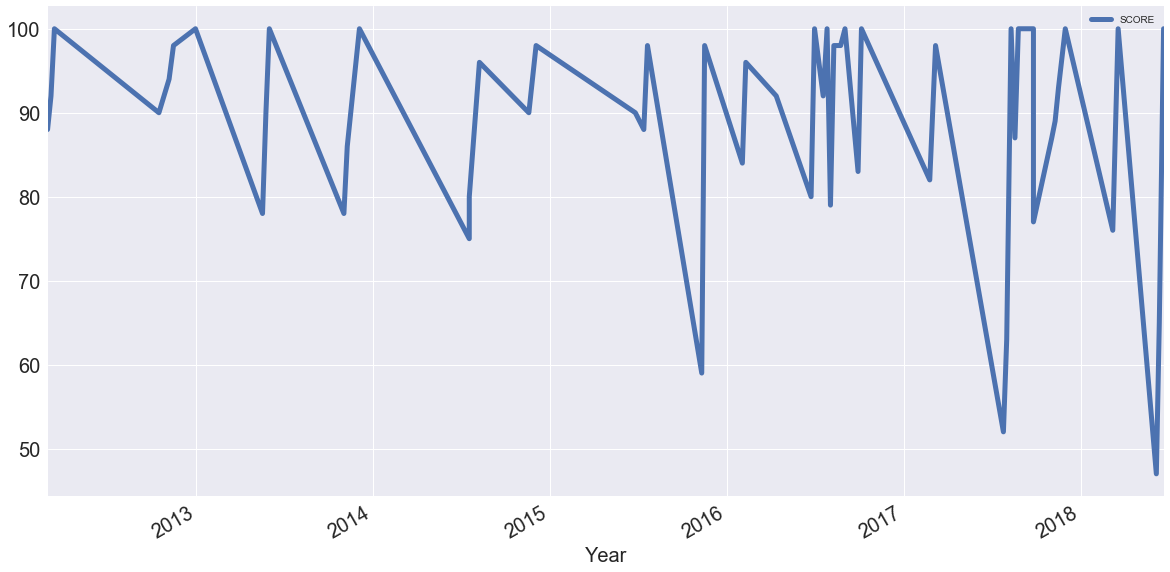

In [59]:
# plot the score related to establishment with license number 24709
df54_1[['SCORE']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

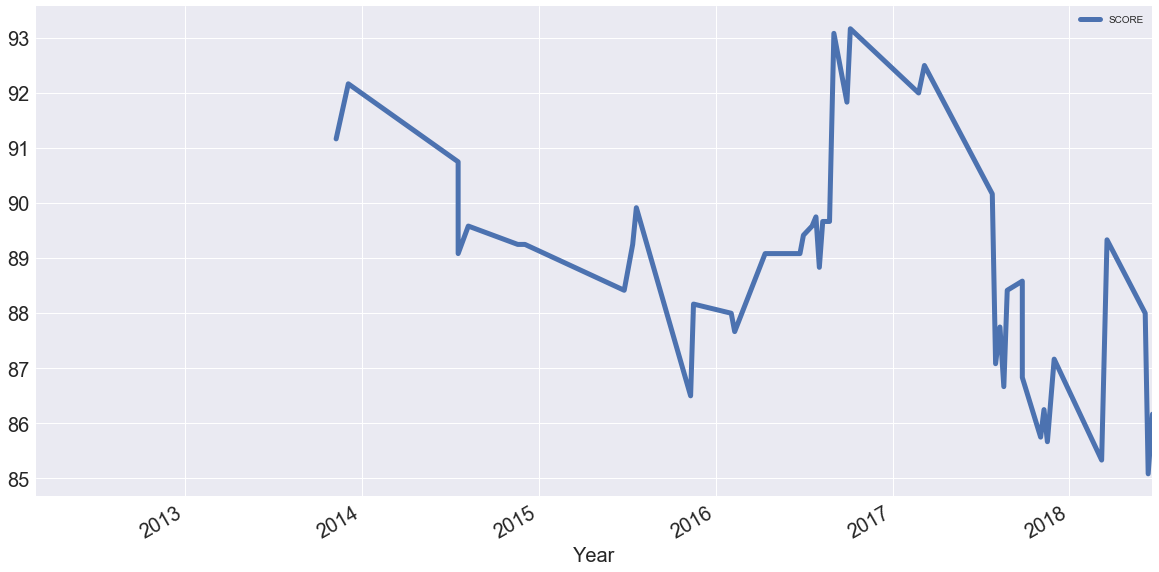

In [60]:
# Here I want identifying trends in this time series. I'm using rolling average.
#With rolling average method, I remove seasonality.
score = df54_1[['SCORE']]
score.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

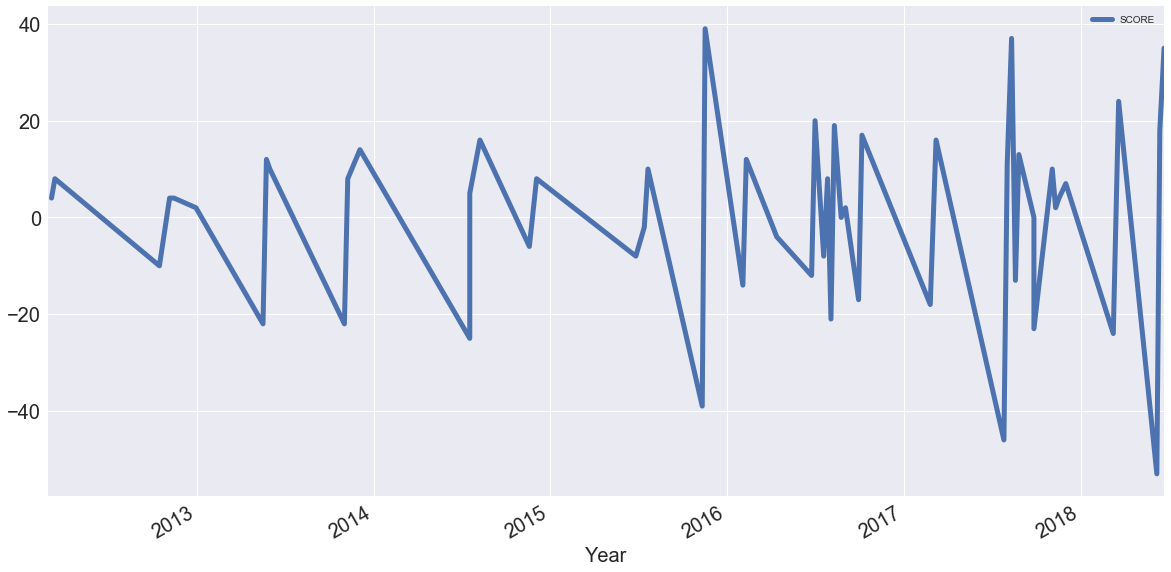

In [61]:
# Here I want invistigate seasonality. By First-order differencing, I remove trends from original plot
score.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

I coudn't see significant seasonality here 

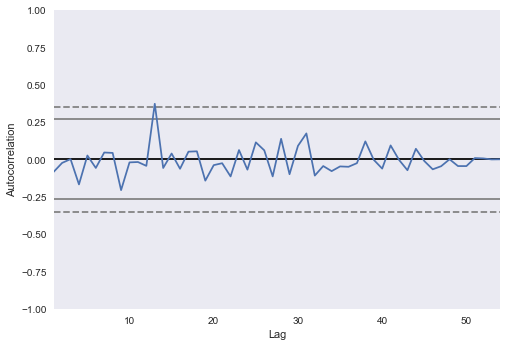

In [62]:
pd.plotting.autocorrelation_plot(score)
plt.show()

We repeat the same steps for the next two license numbers.

## ** License number 74834= 47 inspections **

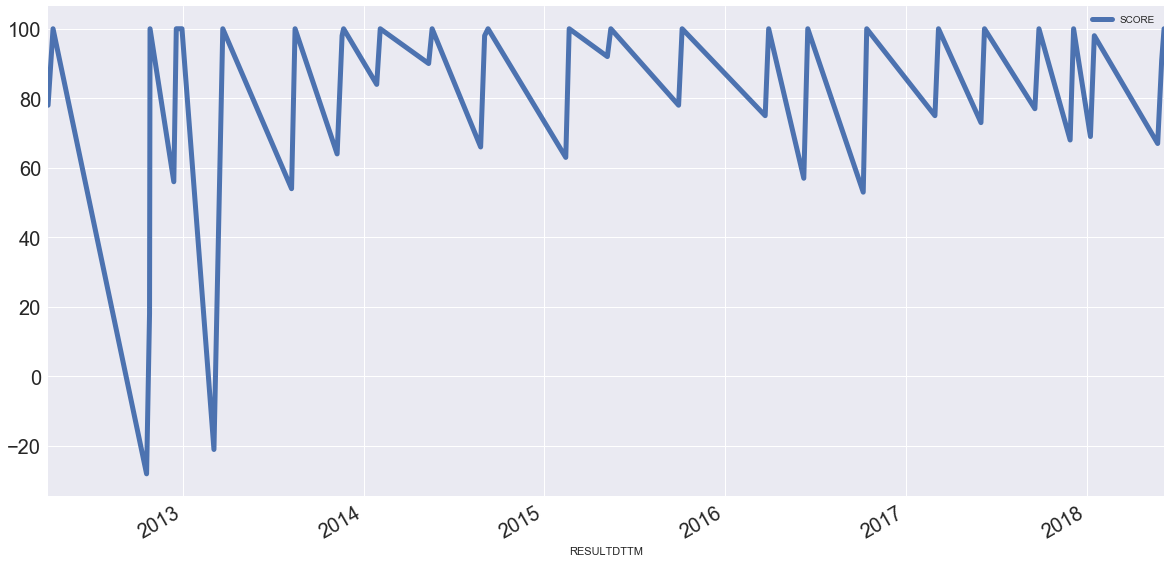

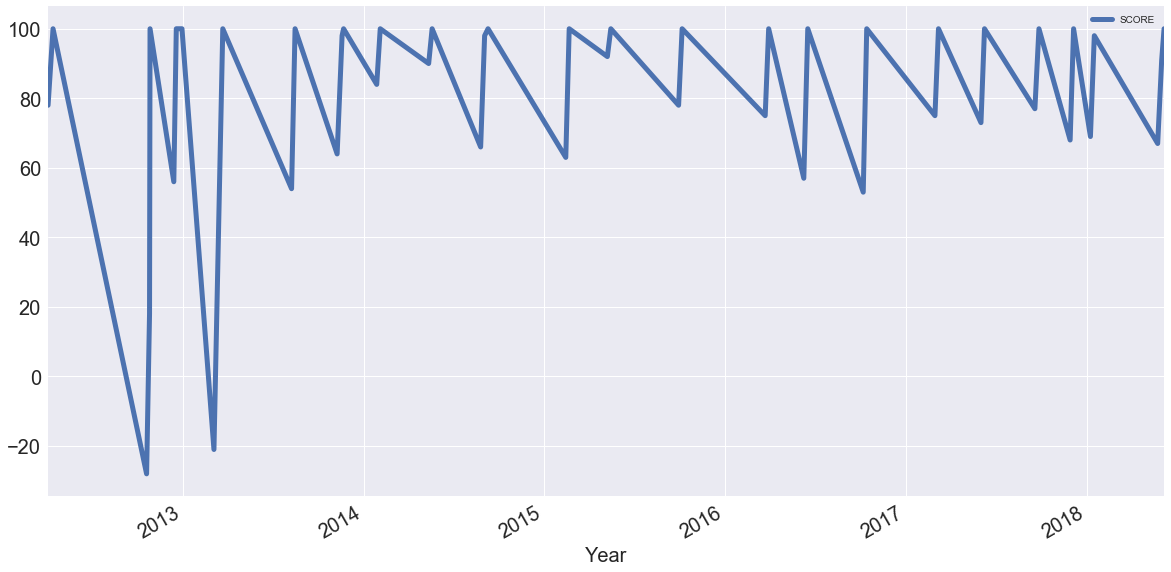

In [144]:
df47 = (result1.loc[result1['LICENSENO'] == 74834])
df47_1= df47.drop(['LICENSENO','Eins'],axis=1)
df47_1.set_index('RESULTDTTM', inplace=True)
df47_1[['SCORE']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

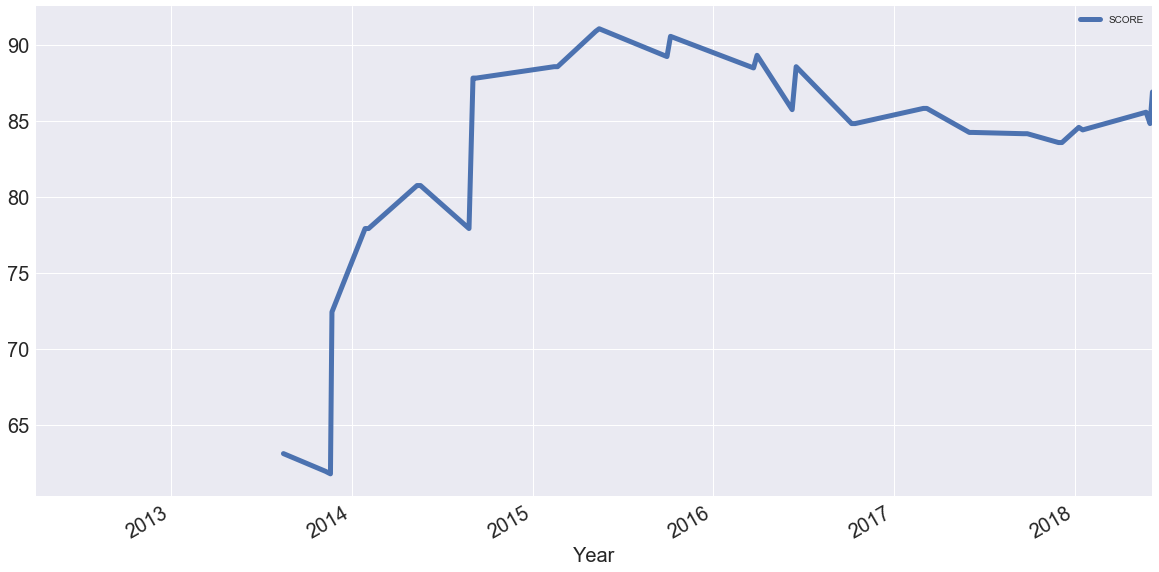

In [145]:
score47 = df47_1[['SCORE']]
score47.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

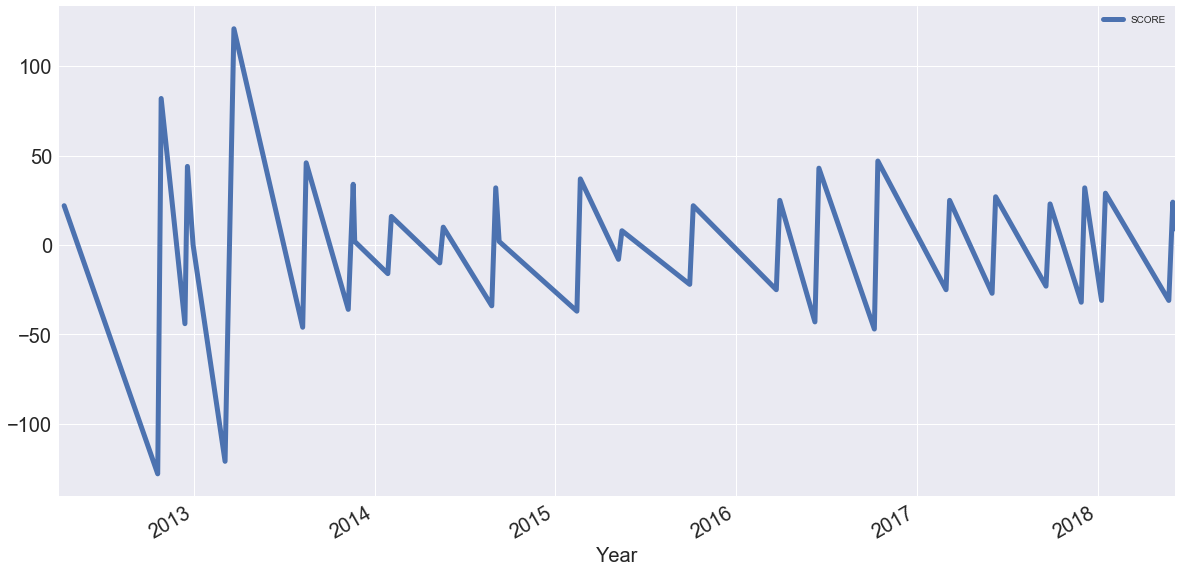

In [146]:
score47.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

## ** License number 21201= 46 inspections **

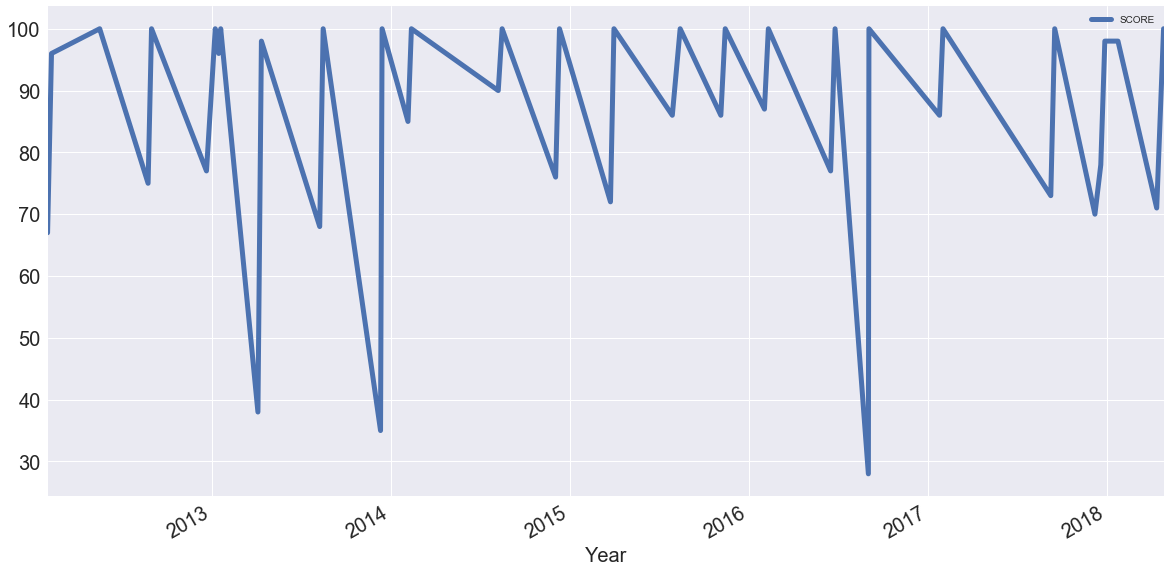

In [147]:
df46 = (result1.loc[result1['LICENSENO'] == 21201])
df46_1= df46.drop(['LICENSENO','Eins'],axis=1)
df46_1.set_index('RESULTDTTM', inplace=True)
df46_1[['SCORE']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

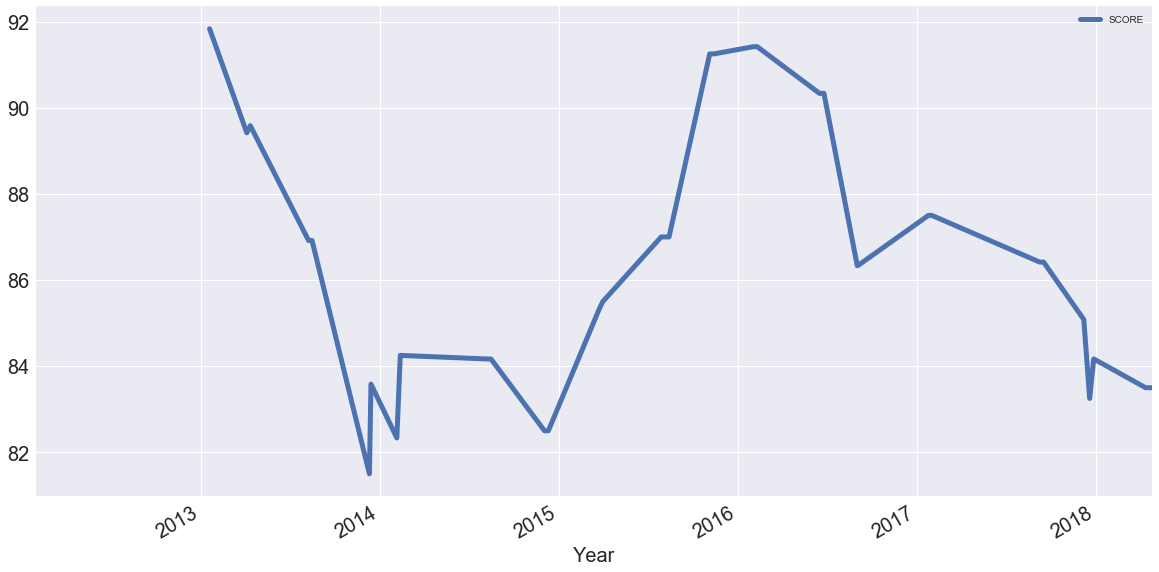

In [170]:
score46 = df46_1[['SCORE']]
score46.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

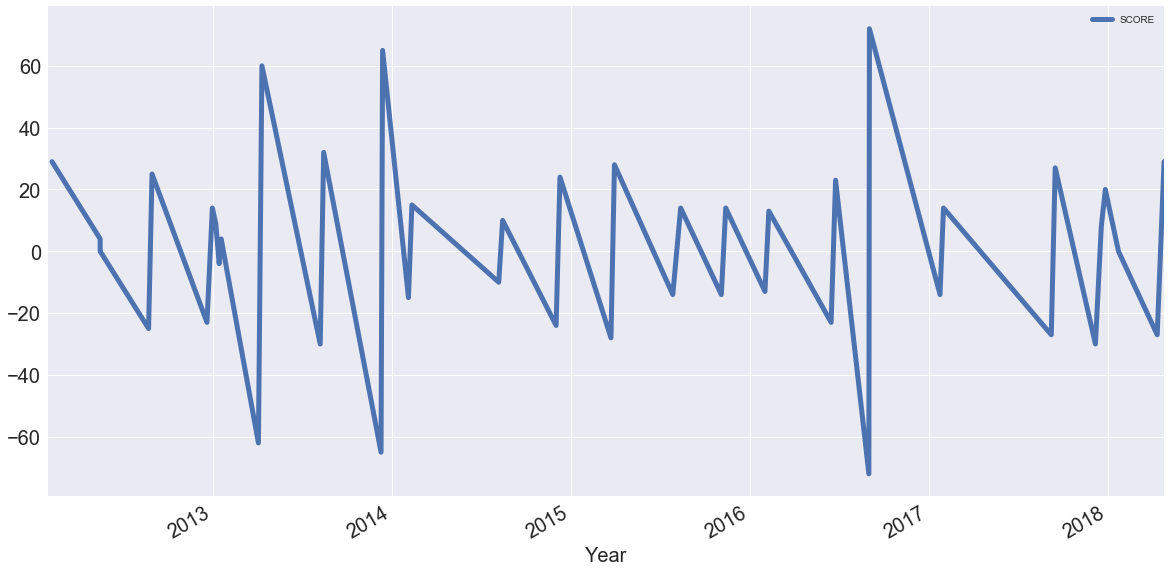

In [149]:
score46.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

## Conclusion: effect of inspection for Eating and Drinking Establishment with Take-Out Service

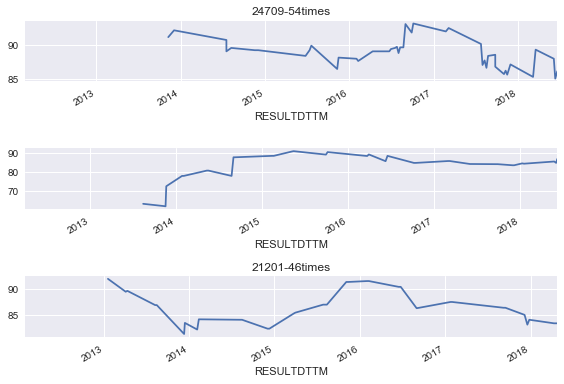

In [177]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

score.rolling(12).mean().plot(legend=False, ax=ax1)
ax1.set_title("24709-54times")

score47.rolling(12).mean().plot(legend=False, ax=ax2)
ax3.set_title("74834-47times")

score46.rolling(12).mean().plot(legend=False, ax=ax3)
ax3.set_title("21201-46times")

plt.tight_layout()
plt.show()

I couldn't see any increasing or decreasing trends in this period of time. Moreover, there is no seasonality here.
So, I conclude that the inspection didn't improve Eating and Drinking Establishment with Take-Out service.

# ** Find trend and seasonality for the 3 most repeated license number in FS category **

##  ** License number 24748= 50 inspections ** 

In [87]:
df50 = (result1.loc[result1['LICENSENO'] == 24748])
df50_1= df50.drop(['LICENSENO','Eins'],axis=1)
df50_1.set_index('RESULTDTTM', inplace=True)
df50_1[['SCORE']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

,LICENSENO,Eins,LICENSECAT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
27700,24748,50,FS,HE_Pass,2012-02-28 11:02:00,0,100,A
27701,24748,50,FS,HE_Fail,2012-08-30 10:10:00,137,-37,C
27702,24748,50,FS,HE_Hearing,2012-09-07 11:14:00,54,46,C
27703,24748,50,FS,HE_Pass,2012-09-20 11:44:00,0,100,A
27704,24748,50,FS,HE_Fail,2012-12-11 10:12:00,205,-105,C


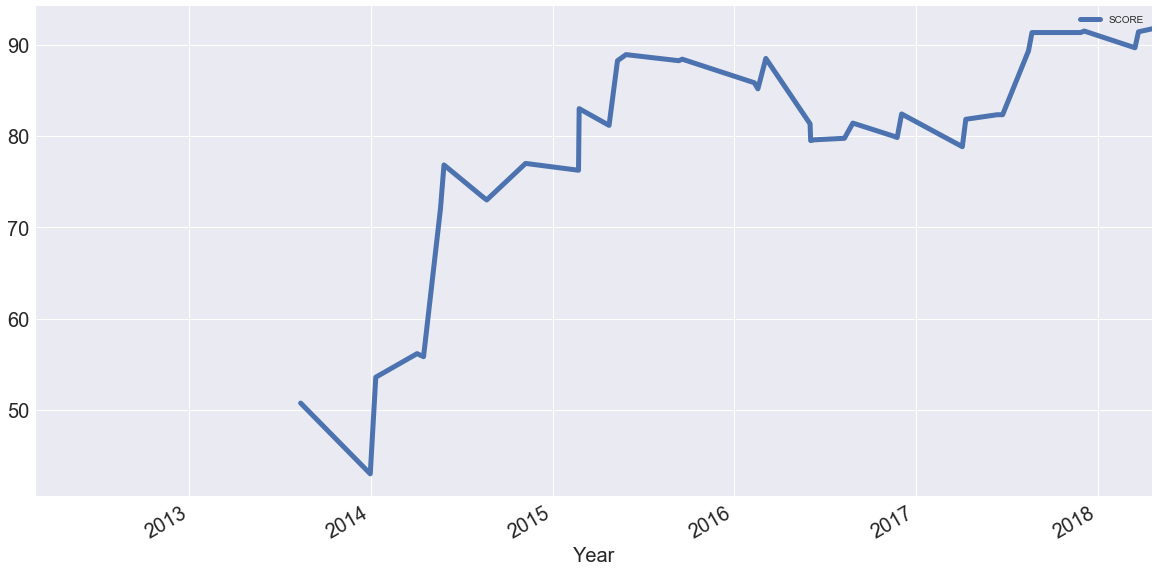

In [151]:
score50 = df50_1[['SCORE']]
score50.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

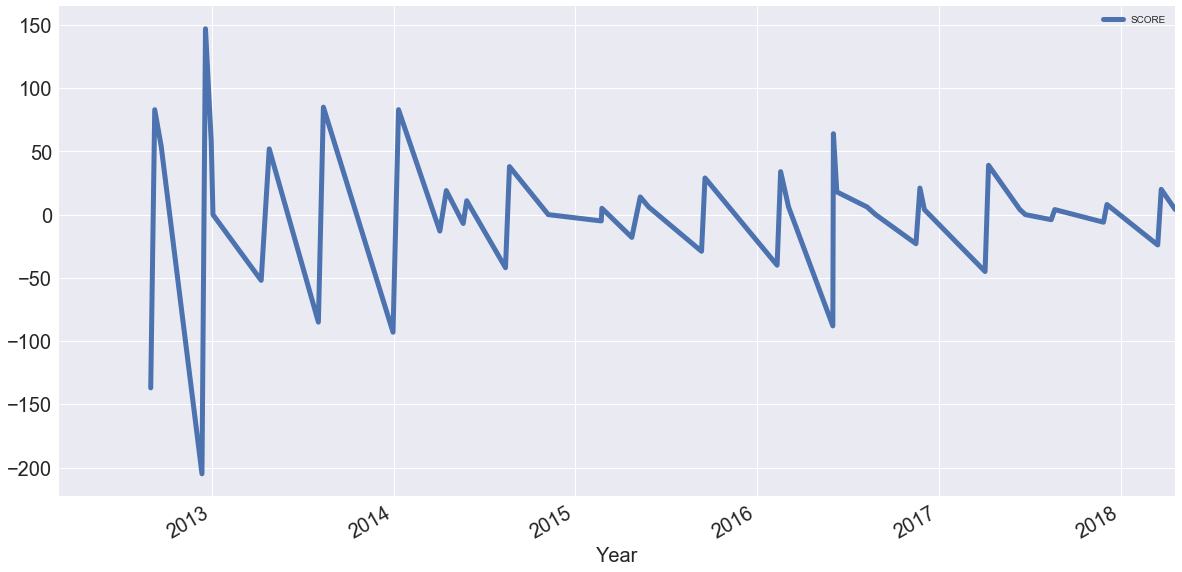

In [153]:
score50.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

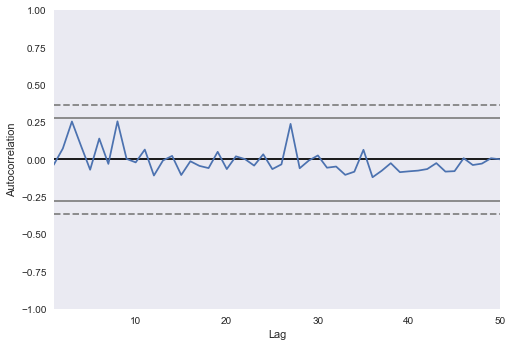

In [155]:
pd.plotting.autocorrelation_plot(score50)
plt.show()

## ** License number 78286= 47 inspections **

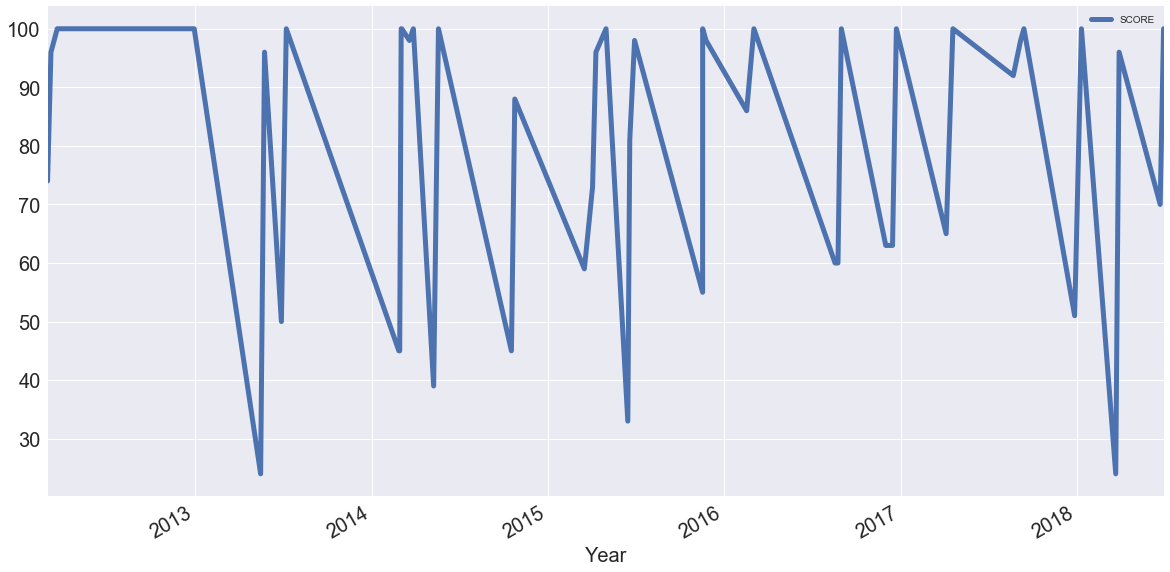

In [150]:
df471 = (result1.loc[result1['LICENSENO'] == 78286])
df471_1= df471.drop(['LICENSENO','Eins'],axis=1)
df471_1.set_index('RESULTDTTM', inplace=True)
df471_1[['SCORE']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

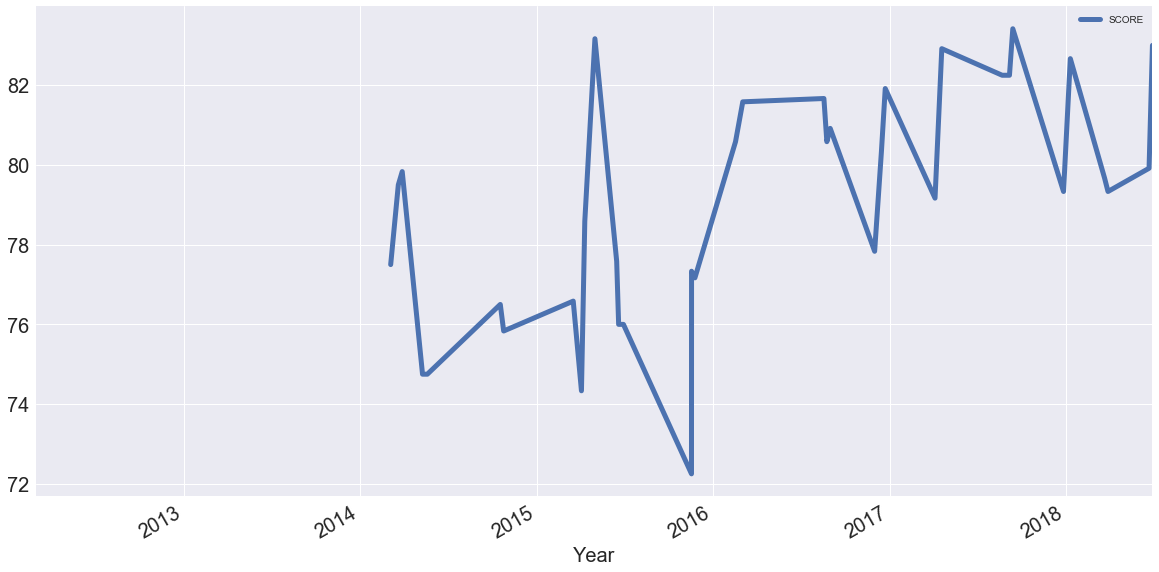

In [152]:
score471 = df471_1[['SCORE']]
score471.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

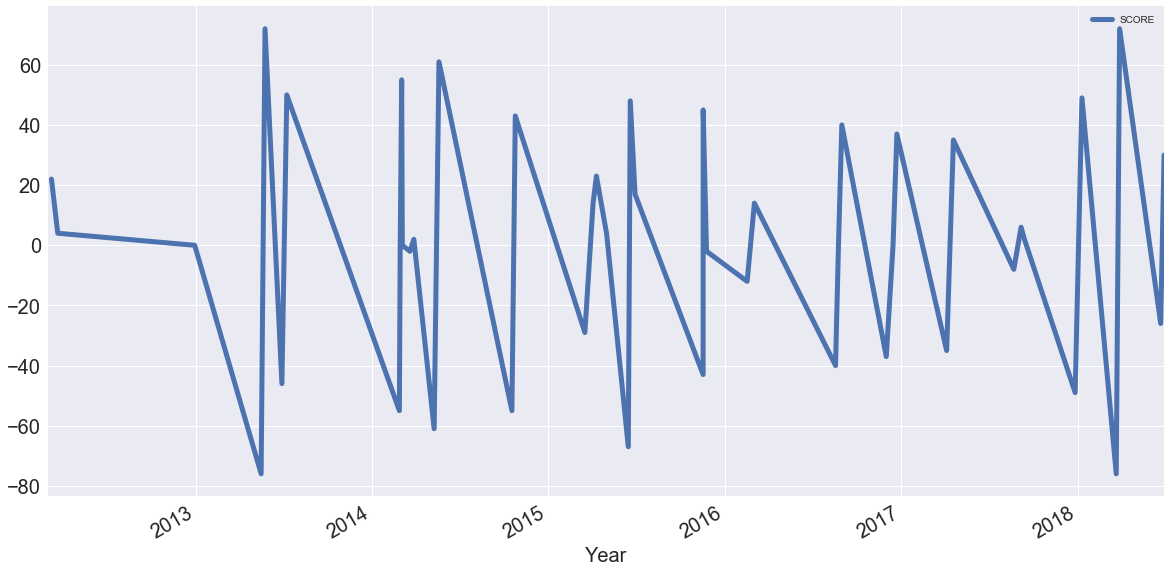

In [154]:
score471.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

## ** License number 19901= 43 inspections**

In [64]:
df43 = (result1.loc[result1['LICENSENO'] == 19901])
df43.head()

,LICENSENO,Eins,LICENSECAT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
8258,19901,43,FS,HE_Filed,2012-04-09 13:47:00,2,98,A
8259,19901,43,FS,HE_Fail,2012-10-31 13:39:00,114,-14,C
8260,19901,43,FS,HE_FailExt,2012-11-01 15:12:00,6,94,A
8261,19901,43,FS,HE_Pass,2012-11-29 11:23:00,0,100,A
8262,19901,43,FS,HE_Filed,2012-12-27 14:22:00,4,96,A


In [157]:
df43_1= df43.drop(['LICENSENO','Eins'],axis=1)
df43_1.set_index('RESULTDTTM', inplace=True)
df43_1.head()

,LICENSECAT,RESULT,SUM_VIOLATIONS,SCORE,GRADE
RESULTDTTM,,,,,
2012-04-09 13:47:00,FS,HE_Filed,2,98,A
2012-10-31 13:39:00,FS,HE_Fail,114,-14,C
2012-11-01 15:12:00,FS,HE_FailExt,6,94,A
2012-11-29 11:23:00,FS,HE_Pass,0,100,A
2012-12-27 14:22:00,FS,HE_Filed,4,96,A


In [66]:
df43_1.corr()

,SUM_VIOLATIONS,SCORE
SUM_VIOLATIONS,1.0,-1.0
SCORE,-1.0,1.0


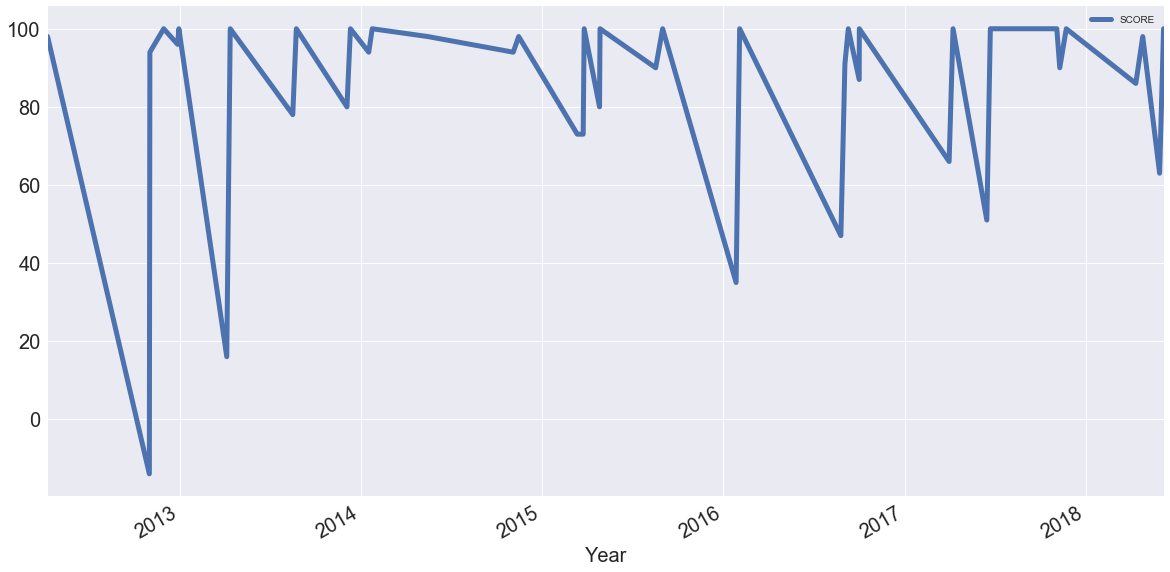

In [68]:
df43_1[['SCORE']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

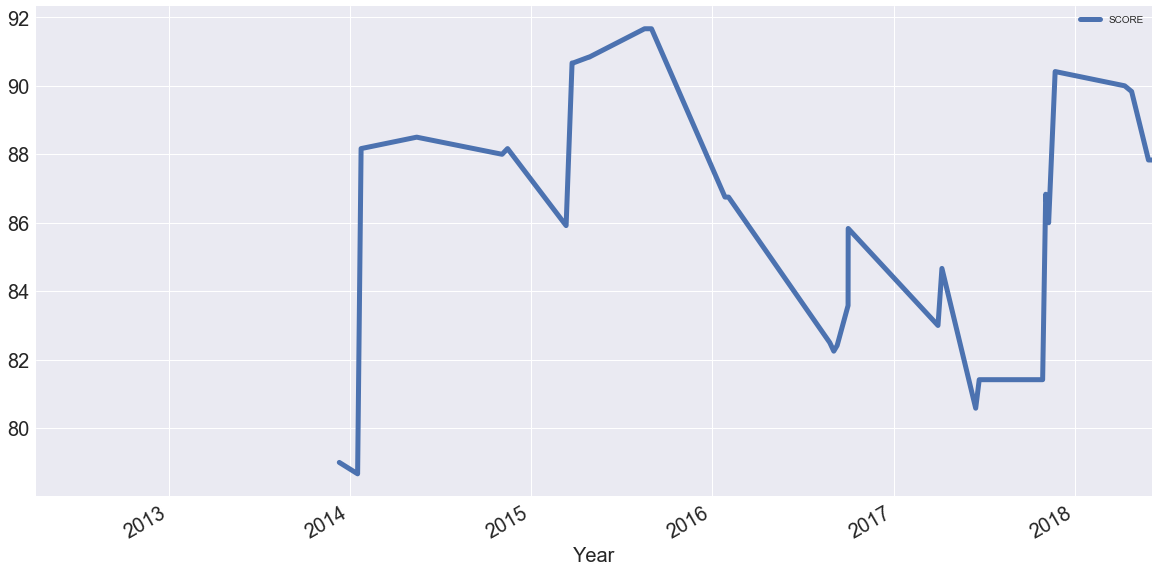

In [69]:
score43 = df43_1[['SCORE']]
score43.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

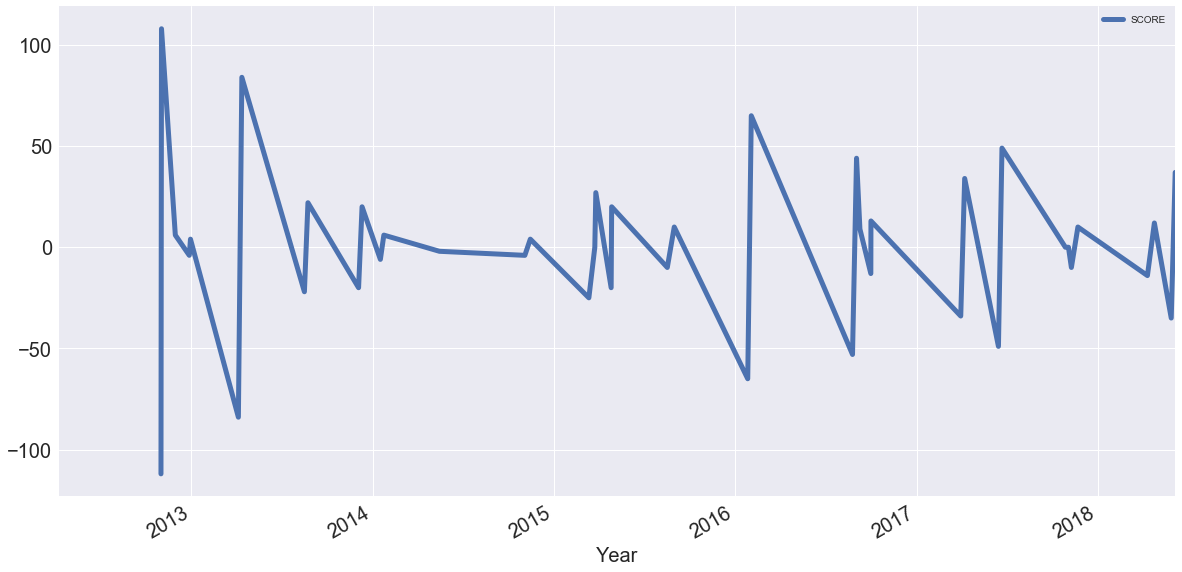

In [70]:
score43.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

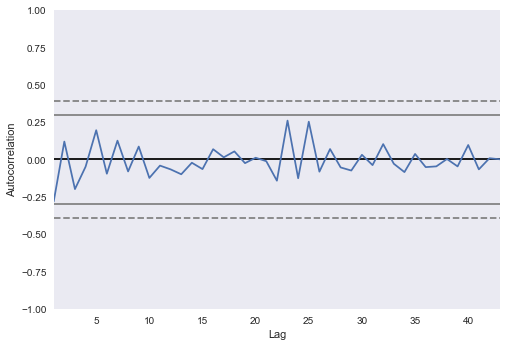

In [72]:
pd.plotting.autocorrelation_plot(score43)
plt.show()

## Conclusion: Effect of inspections on Eating and Drinking Establishment

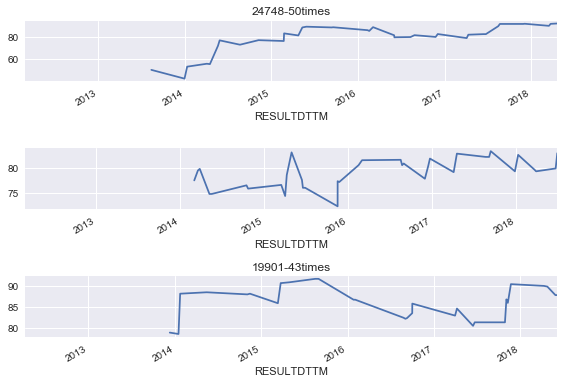

In [178]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

score50.rolling(12).mean().plot(legend=False, ax=ax1)
ax1.set_title("24748-50times")

score471.rolling(12).mean().plot(legend=False, ax=ax2)
ax3.set_title("78286-47times")

score43.rolling(12).mean().plot(legend=False, ax=ax3)
ax3.set_title("19901-43times")

plt.tight_layout()
plt.show()

By comparing trends of the most 3 repeated license numbers in FS , we can see small increase in their scores between 2012 and 2018. So, we can say that inspection improved the Eating and Drinking Establishments performance.

# ** Find trend and seasonality for repeated the most license number in RF category **

## ** License number 31259= 45 inspections **

In [158]:
df45 = (result1.loc[result1['LICENSENO'] == 31259])
df45_1= df45.drop(['LICENSENO','Eins'],axis=1)
df45_1.set_index('RESULTDTTM', inplace=True)
df45_1.head()

,LICENSECAT,RESULT,SUM_VIOLATIONS,SCORE,GRADE
RESULTDTTM,,,,,
2012-04-11 13:33:00,RF,HE_Fail,6,94,A
2012-04-17 10:02:00,RF,HE_Pass,0,100,A
2012-08-24 07:44:00,RF,HE_Fail,48,52,C
2012-08-31 13:15:00,RF,HE_FailExt,37,63,C
2012-09-07 11:14:00,RF,HE_Filed,7,93,B


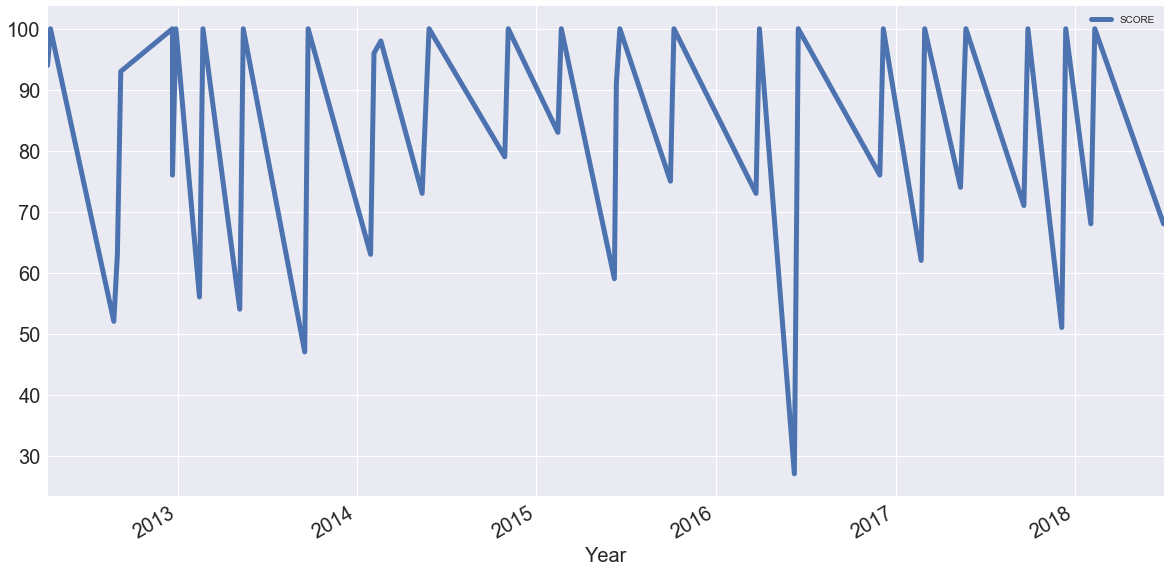

In [159]:
df45_1[['SCORE']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

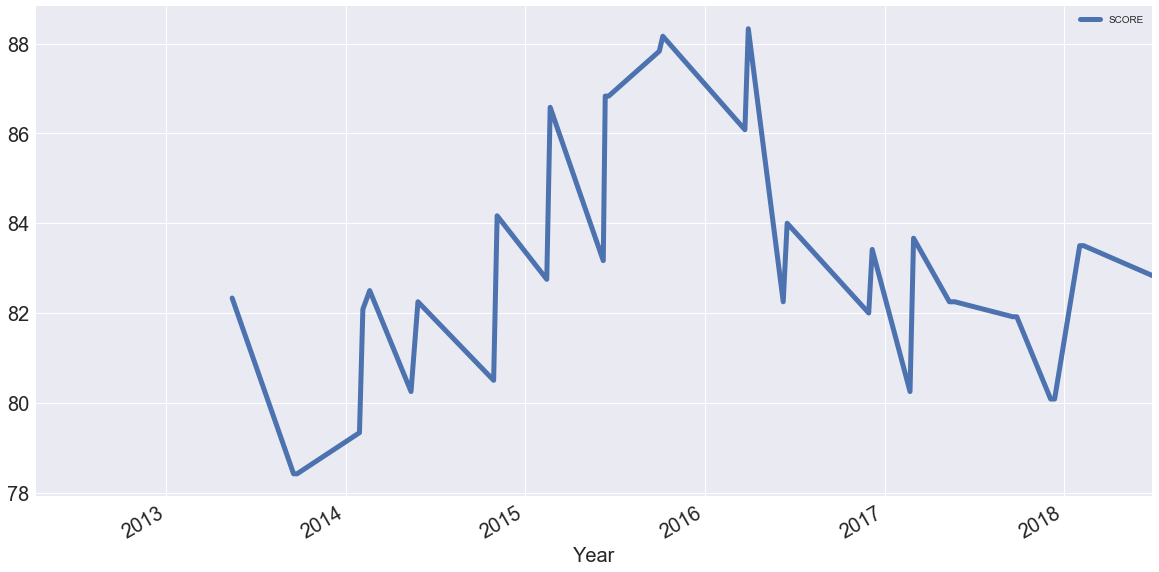

In [160]:
score45 = df45_1[['SCORE']]
score45.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

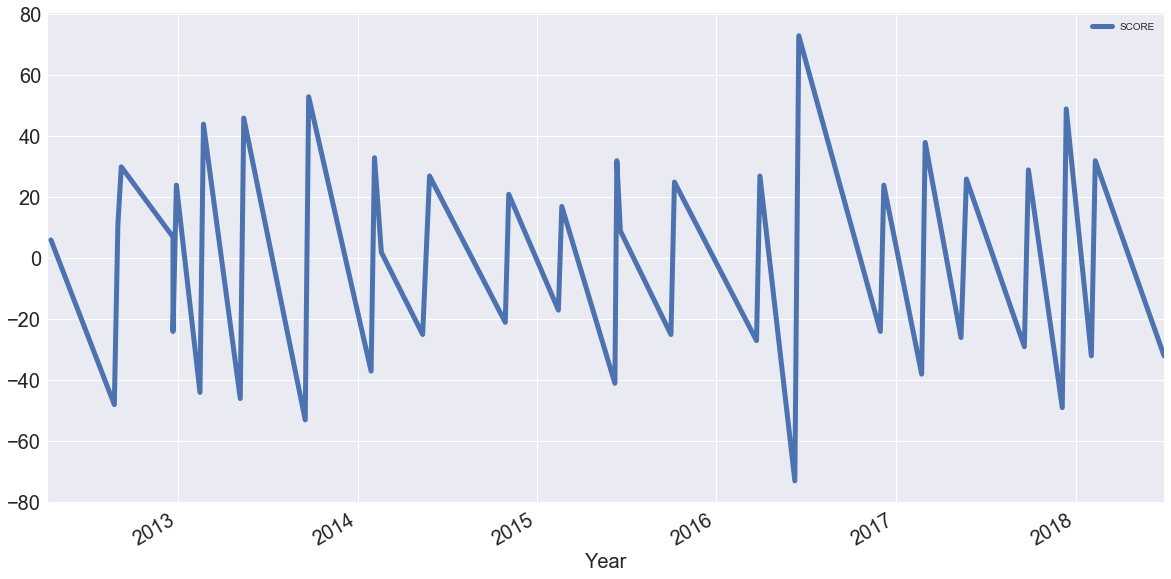

In [161]:
score45.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

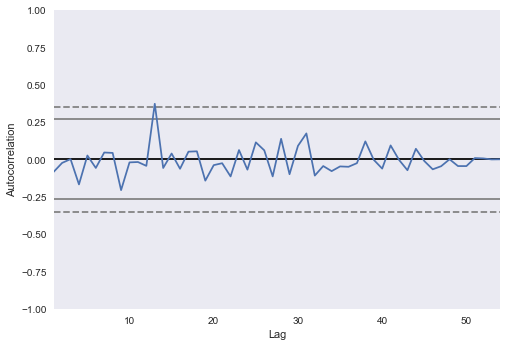

In [79]:
pd.plotting.autocorrelation_plot(score45)
plt.show()

## ** License number 34585= 42 inspections **

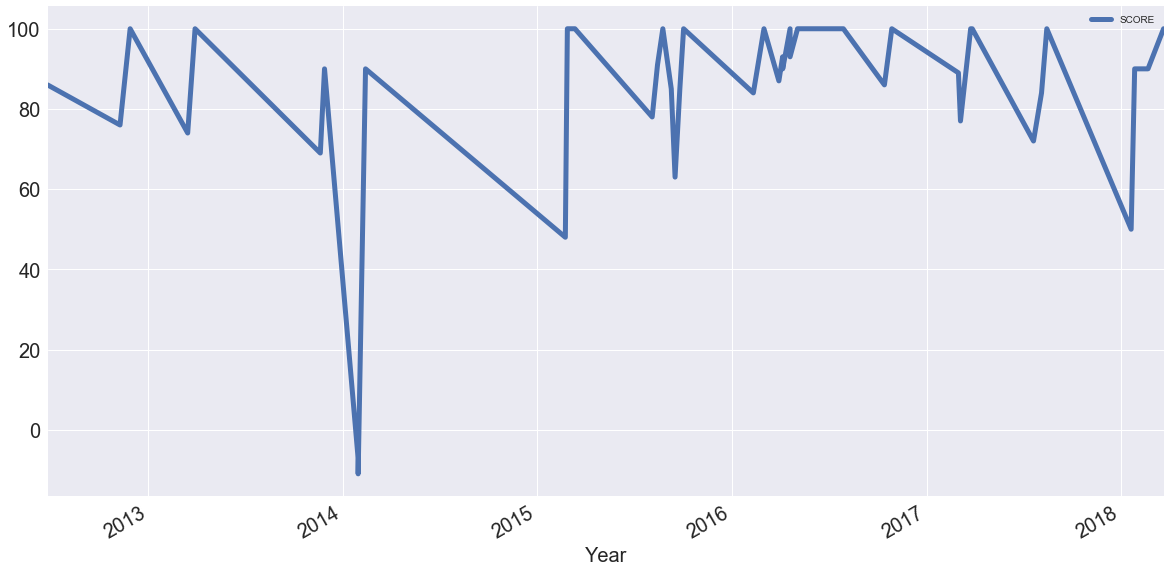

In [162]:
df42 = (result1.loc[result1['LICENSENO'] == 34585])
df42_1= df42.drop(['LICENSENO','Eins'],axis=1)
df42_1.set_index('RESULTDTTM', inplace=True)
df42_1[['SCORE']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

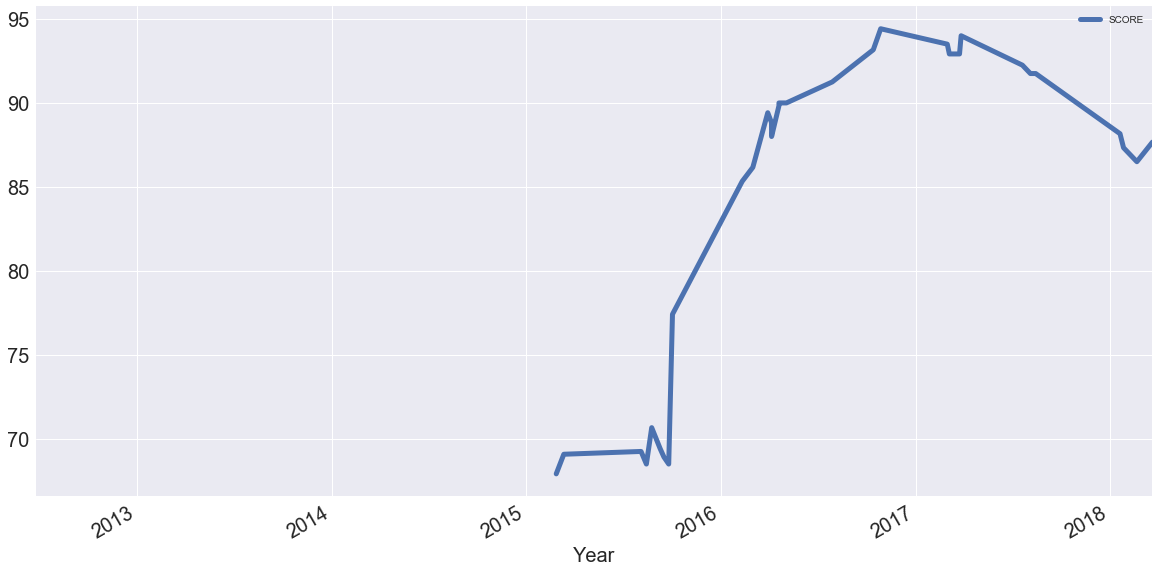

In [163]:
score42 = df42_1[['SCORE']]
score42.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

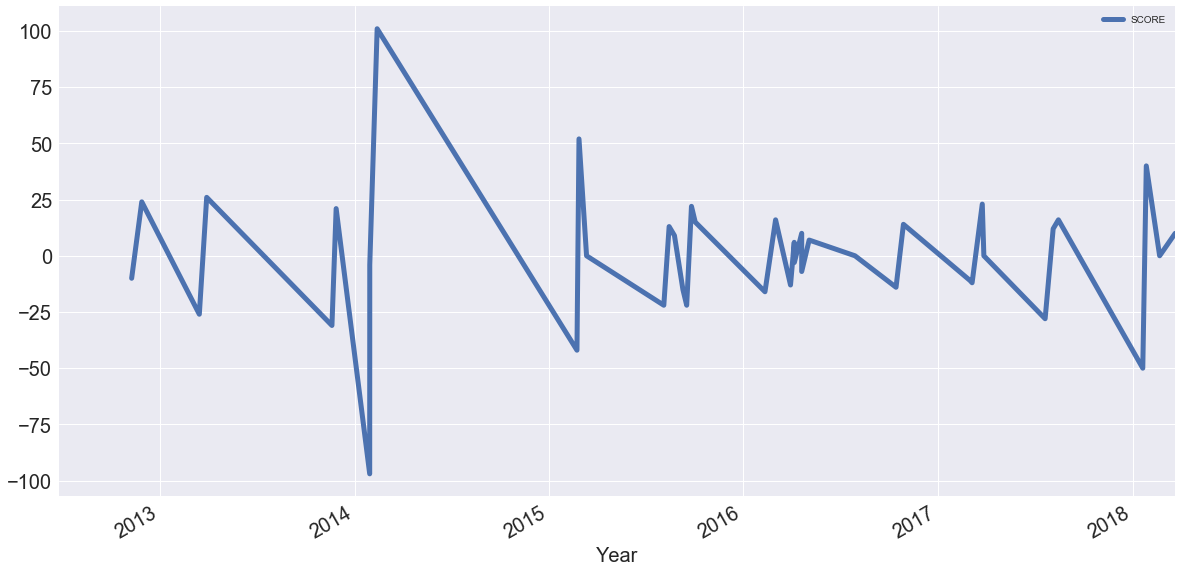

In [165]:
score42.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

## ** They inspected the establishment with license number 25674 for 36 times **

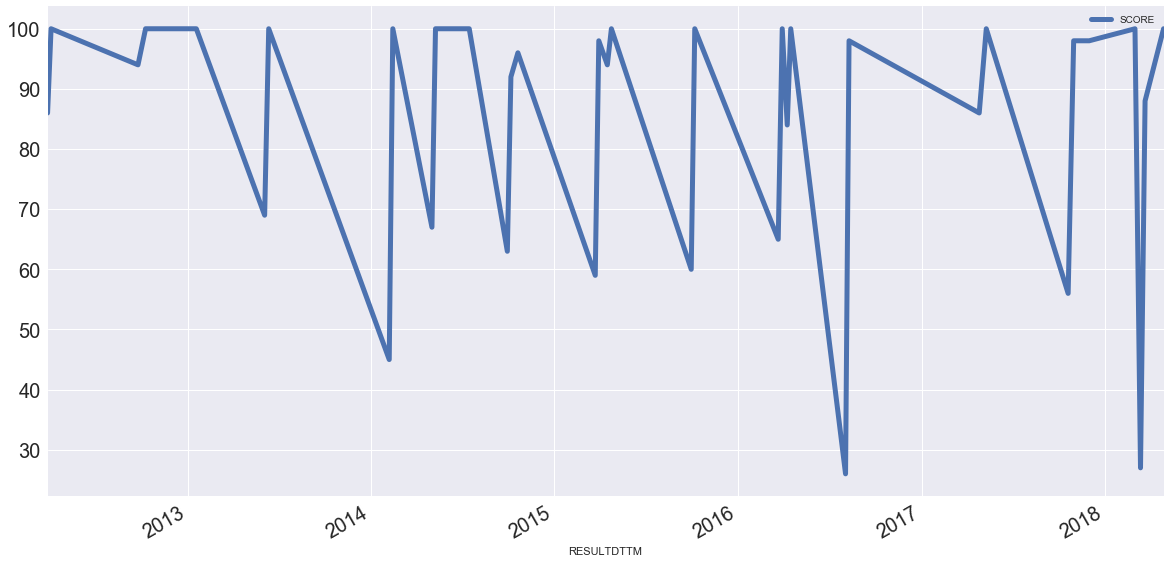

In [184]:
df36 = (result1.loc[result1['LICENSENO'] == 25674])
df36_1= df36.drop(['LICENSENO','Eins'],axis=1)
df36_1.set_index('RESULTDTTM', inplace=True)
df36_1[['SCORE']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

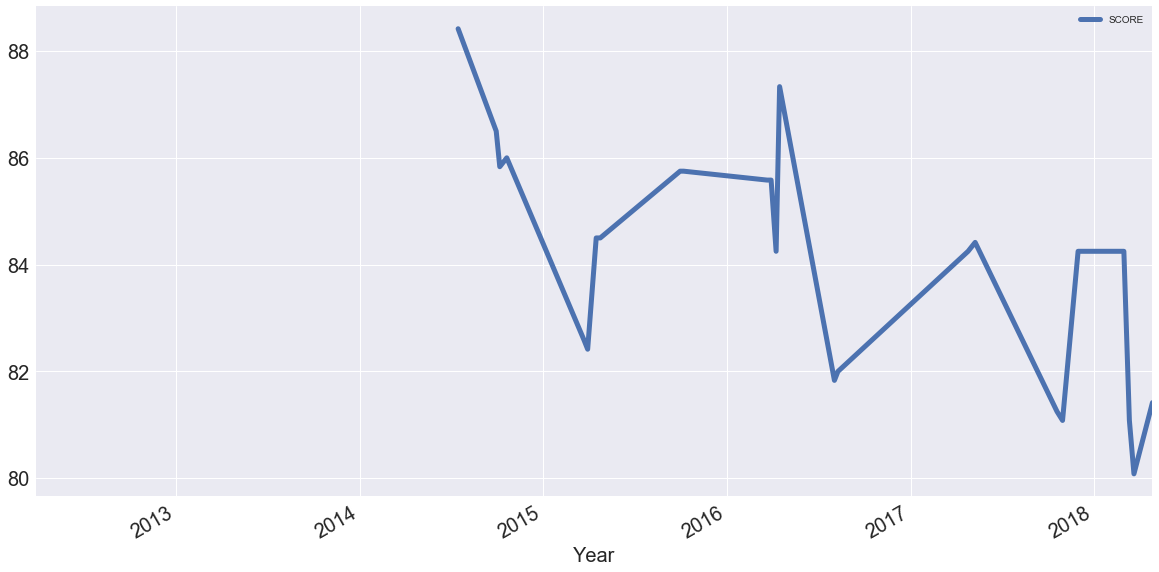

In [186]:
score36 = df36_1[['SCORE']]
score36.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

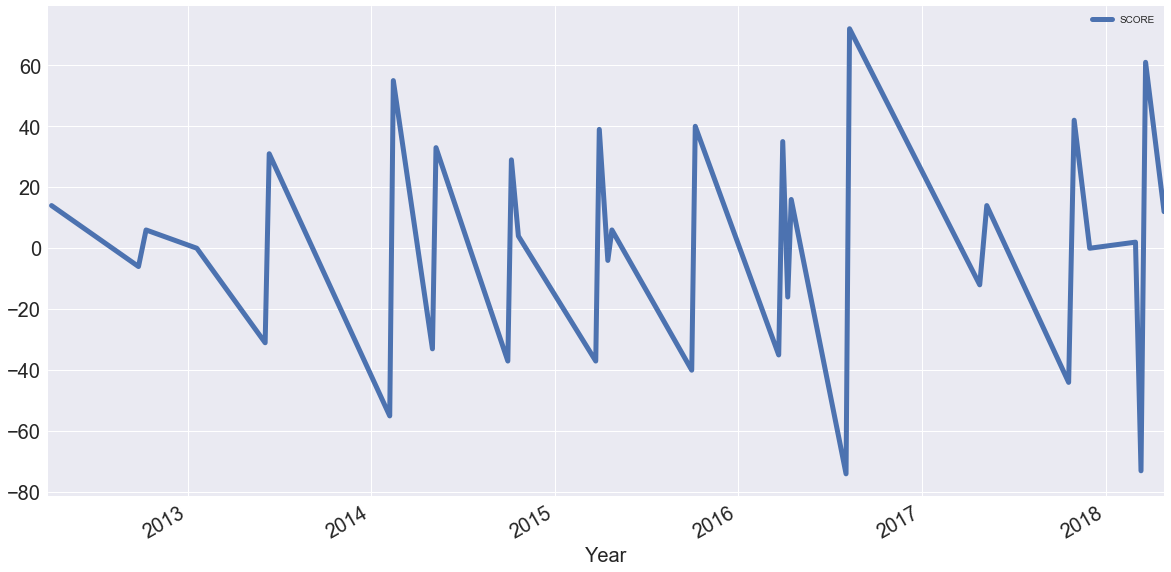

In [187]:
score36.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

## Conclusion: Effect of inspections on Retail Food Establishment 

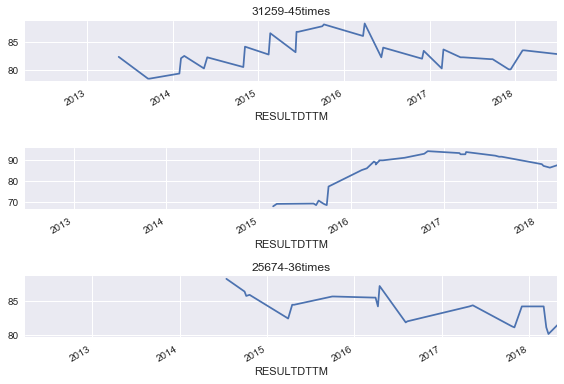

In [188]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

score45.rolling(12).mean().plot(legend=False, ax=ax1)
ax1.set_title("31259-45times")

score42.rolling(12).mean().plot(legend=False, ax=ax2)
ax3.set_title("34585-42times")

score36.rolling(12).mean().plot(legend=False, ax=ax3)
ax3.set_title("25674-36times")

plt.tight_layout()
plt.show()

By comparing these graphs, I couldn't see any significant trends or seasonality.

 # ** Find trend and seasonality for repeated the most license number in MFW category **

## ** License number 37237= 30 inspections   **

In [80]:
df30= (result1.loc[result1['LICENSENO'] == 37237])
df30.head()

,LICENSENO,Eins,LICENSECAT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
43142,37237,30,MFW,HE_Fail,2012-03-21 11:43:00,26,74,C
43143,37237,30,MFW,HE_Pass,2012-03-29 14:30:00,0,100,A
43144,37237,30,MFW,HE_NotReq,2012-12-30 00:00:00,0,100,A
43145,37237,30,MFW,HE_Fail,2013-01-14 12:43:00,18,82,B
43146,37237,30,MFW,HE_Pass,2013-01-23 12:01:00,0,100,A


In [81]:
df30_1= df30.drop(['LICENSENO','Eins'],axis=1)
df30_1.head()

,LICENSECAT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
43142,MFW,HE_Fail,2012-03-21 11:43:00,26,74,C
43143,MFW,HE_Pass,2012-03-29 14:30:00,0,100,A
43144,MFW,HE_NotReq,2012-12-30 00:00:00,0,100,A
43145,MFW,HE_Fail,2013-01-14 12:43:00,18,82,B
43146,MFW,HE_Pass,2013-01-23 12:01:00,0,100,A


In [82]:
df30_1.set_index('RESULTDTTM', inplace=True)
df30_1.head()

,LICENSECAT,RESULT,SUM_VIOLATIONS,SCORE,GRADE
RESULTDTTM,,,,,
2012-03-21 11:43:00,MFW,HE_Fail,26,74,C
2012-03-29 14:30:00,MFW,HE_Pass,0,100,A
2012-12-30 00:00:00,MFW,HE_NotReq,0,100,A
2013-01-14 12:43:00,MFW,HE_Fail,18,82,B
2013-01-23 12:01:00,MFW,HE_Pass,0,100,A


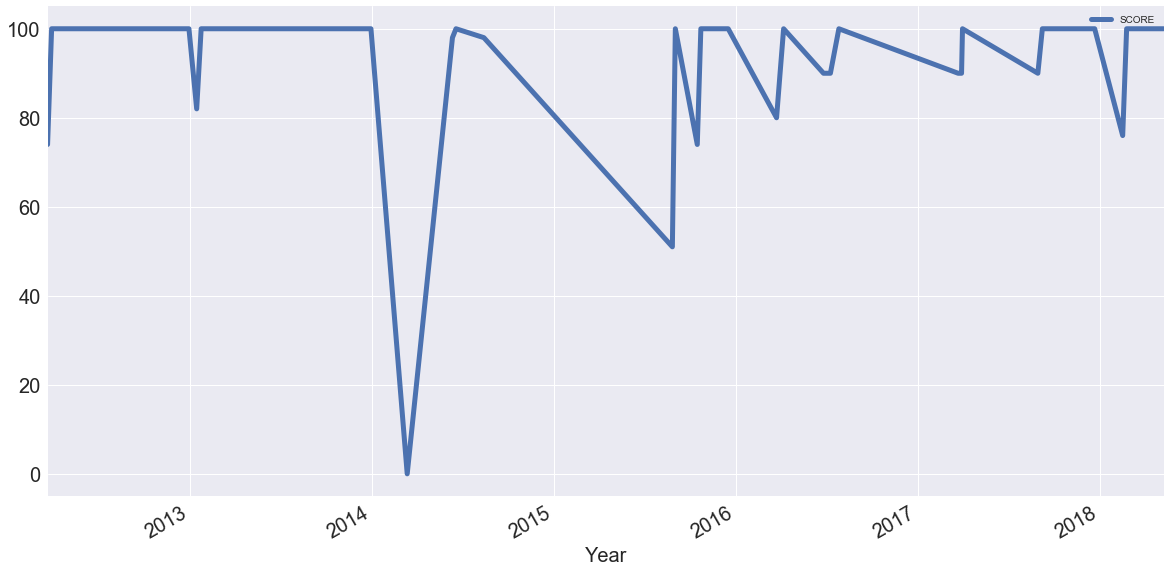

In [83]:
df30_1[['SCORE']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

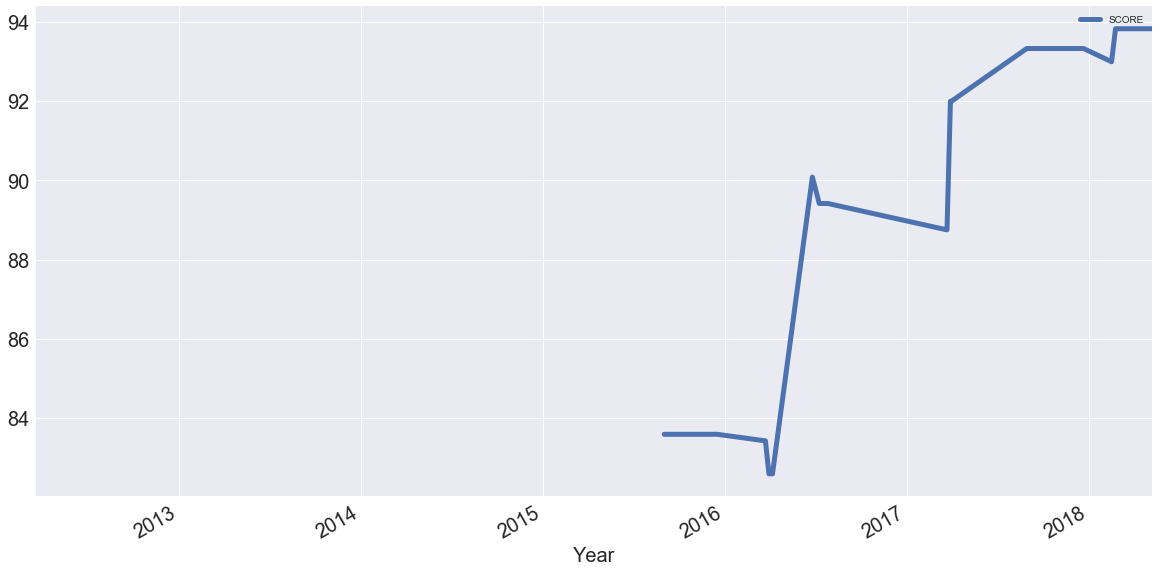

In [84]:
score30 = df30_1[['SCORE']]
score30.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

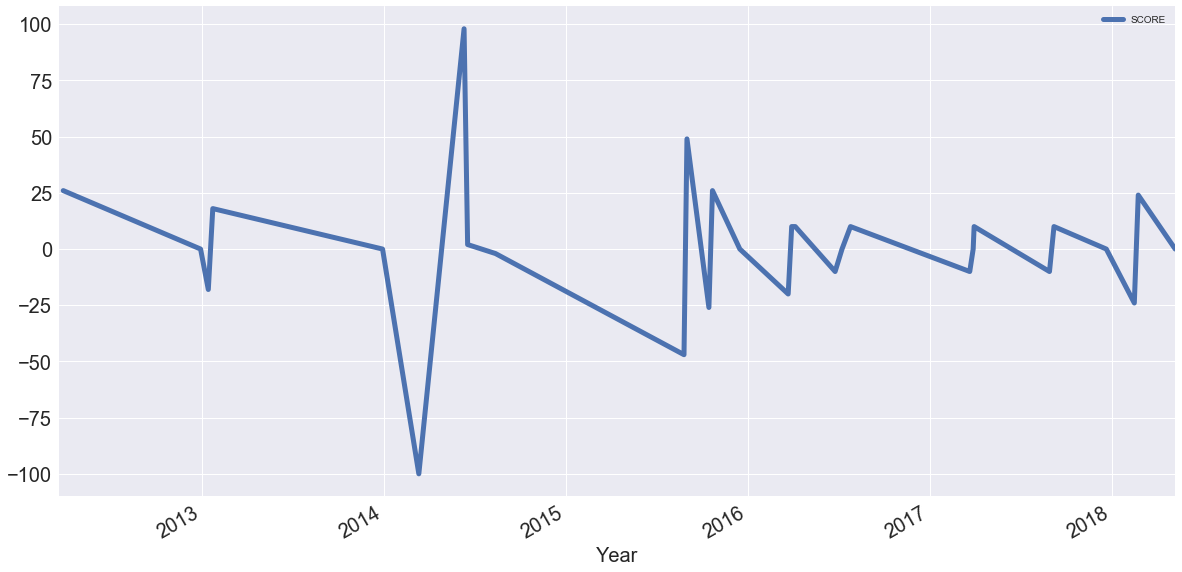

In [85]:
score30.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

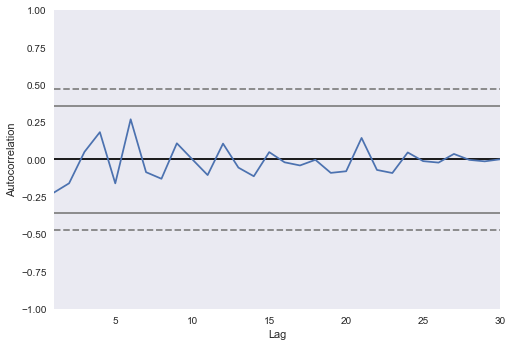

In [86]:
pd.plotting.autocorrelation_plot(score30)
plt.show()

## **License number 37237= 30 inspections  68113 for 29 times**

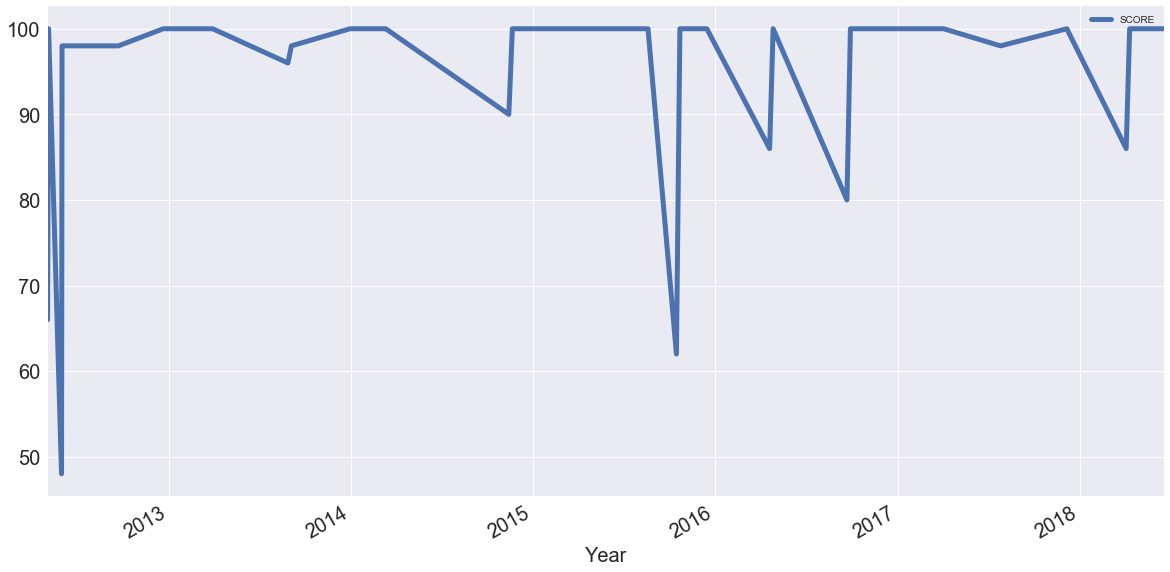

In [199]:
df29 = result1.loc[result1['LICENSENO'] == 68113]
df29_1 = df29.drop(['LICENSENO','Eins'],axis=1)
df29_1.set_index('RESULTDTTM', inplace=True)
df29_1[['SCORE']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

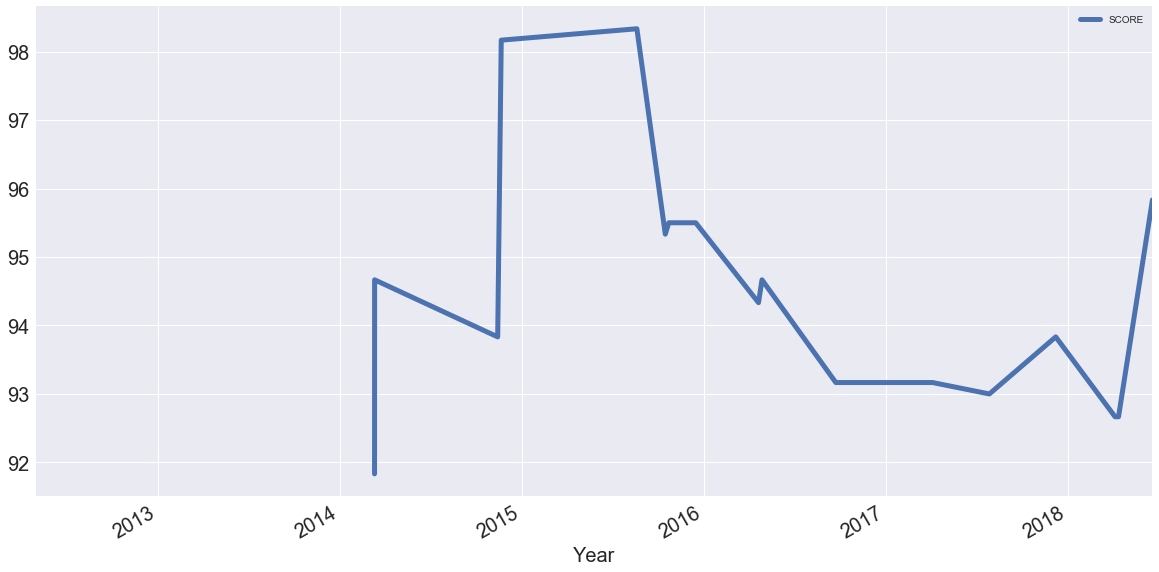

In [200]:
score29 = df29_1[['SCORE']]
score29.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

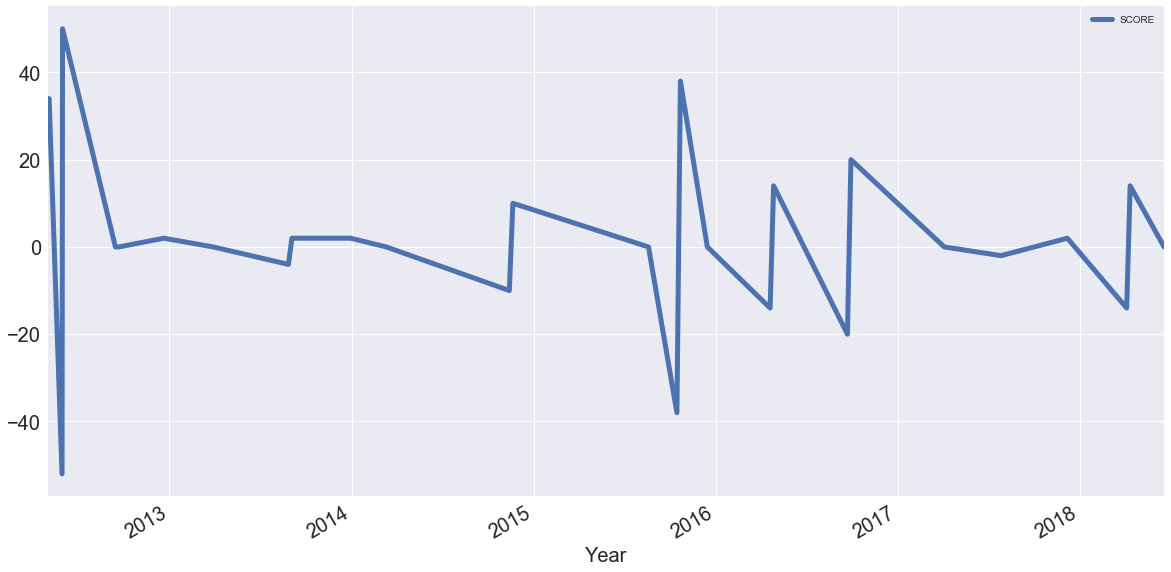

In [201]:
score29.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

## **They inspected the establishment with license number 76220 for 25 times**

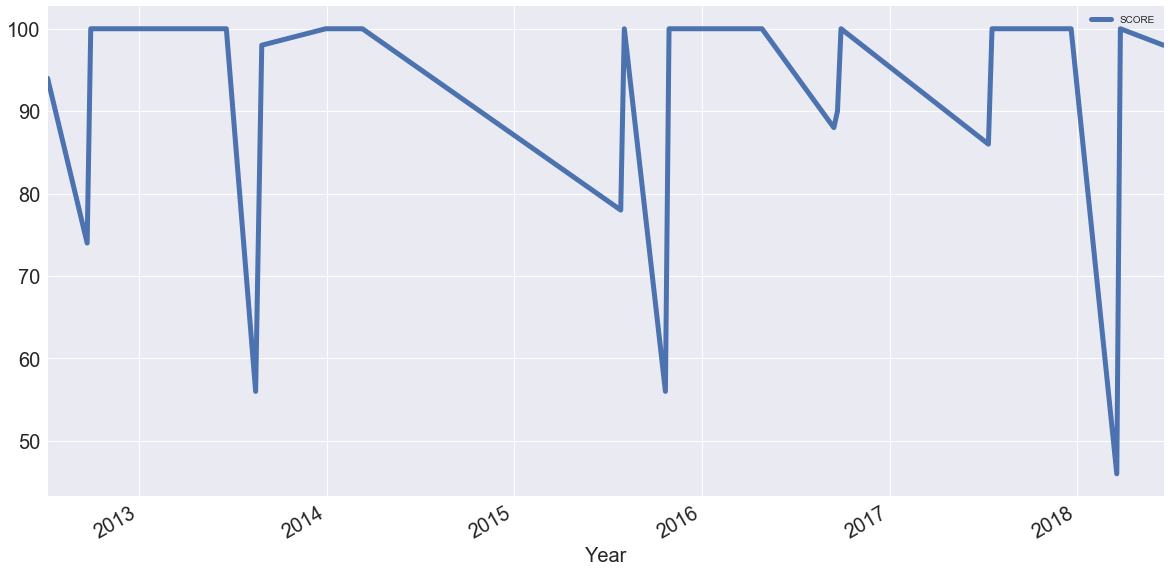

In [203]:
df25 = result1.loc[result1['LICENSENO'] == 76220]
df25_1= df25.drop(['LICENSENO','Eins'],axis=1)
df25_1.set_index('RESULTDTTM', inplace=True)
df25_1[['SCORE']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

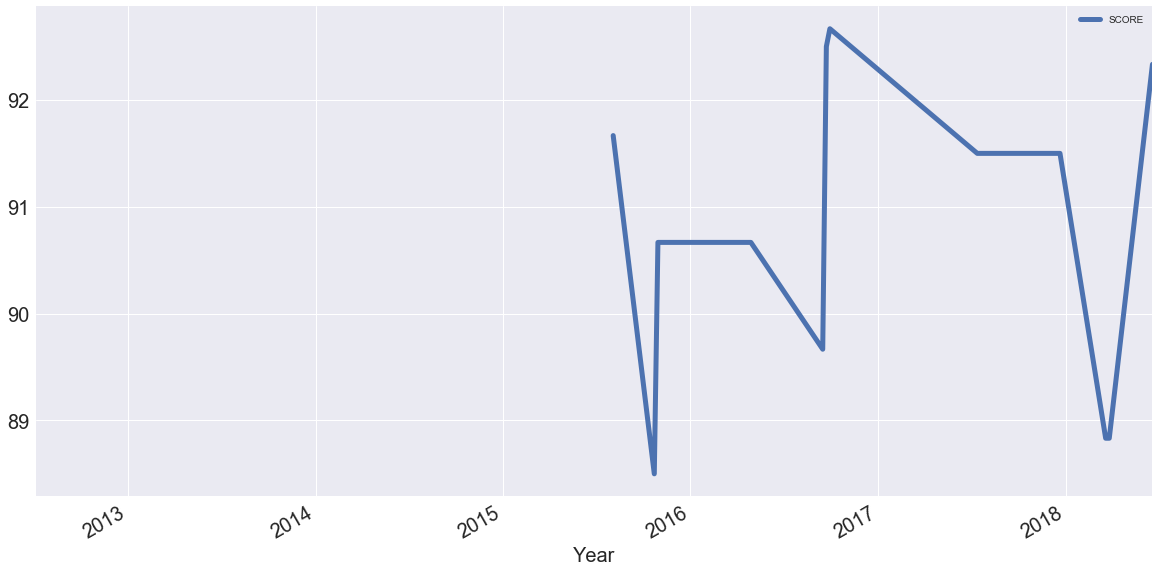

In [204]:
score25 = df25_1[['SCORE']]
score25.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

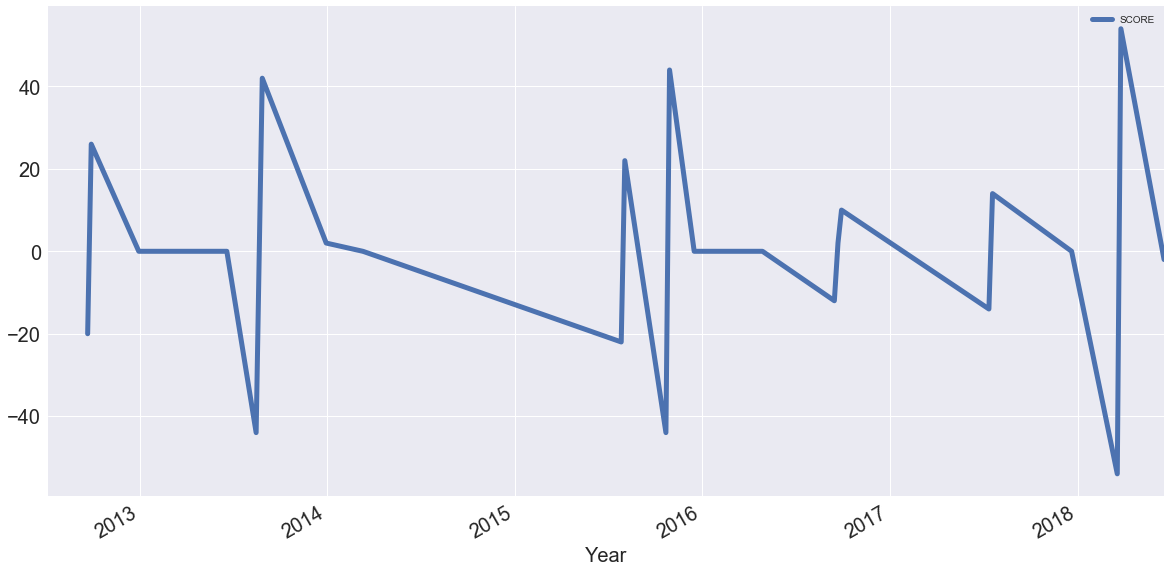

In [205]:
score25.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

## Conclusion: Effect of inspections on Mobile Food Truck or Vendor

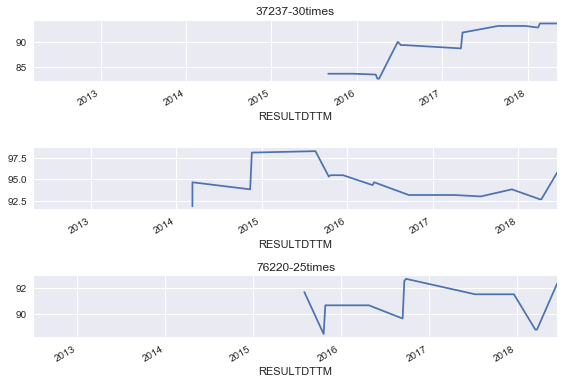

In [206]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

score30.rolling(12).mean().plot(legend=False, ax=ax1)
ax1.set_title("37237-30times")

score29.rolling(12).mean().plot(legend=False, ax=ax2)
ax3.set_title("68113-29times")

score25.rolling(12).mean().plot(legend=False, ax=ax3)
ax3.set_title("76220-25times")

plt.tight_layout()
plt.show()

Since we observe different behaviour in above graphs, we need more analysis to reach a conclusion for this type of establishment. 

# Conclusion

Clearly, this is not a complete analysis and we need further investigations to reach a more accurate answer.